In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pickle

In [2]:
!pip install wordcloud


In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
779,ham,That means get the door,NaN,NaN,NaN
1970,ham,Nvm it's ok...,NaN,NaN,NaN
2943,spam,We currently have a message awaiting your coll...,NaN,NaN,NaN
3146,ham,Oh thats late! Well have a good night and i wi...,NaN,NaN,NaN
3957,ham,So i could kiss and feel you next to me...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#Data Cleaning
#EDA
#Text preprocessing
#model building
#evaluation
#improvement
#implement
#deployment

# 1. Data Cleaning


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.rename(columns={'v1':'Target','v2':'Message'}, inplace = True)

In [11]:
df.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder #assigning 0 and 1 to the value of ham and spam using sklearn 0 for ham, 1 for spam
encoder = LabelEncoder()

In [13]:
df['Target'] = encoder.fit_transform(df['Target'])

In [14]:
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#missing values
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [16]:
#duplicates
df.duplicated().sum()

403

In [17]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [18]:
df.duplicated().sum()

0

# 2. EDA

In [19]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

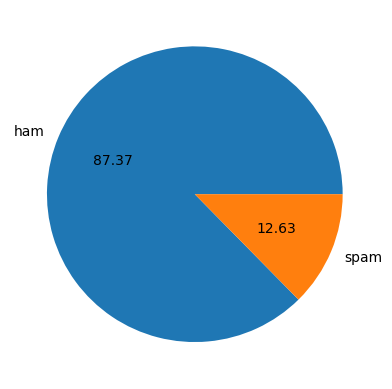

In [20]:
plt.pie(df['Target'].value_counts(), labels =['ham','spam'], autopct='%0.2f')
plt.show()

In [21]:
#data is imbalanced

In [22]:
#creating new columns for eda

In [23]:
#coulums based on len of message

In [24]:
#import nltk

In [25]:
#nltk.download('punkt')

In [26]:
!pip install nltk

In [27]:
df['count_char'] = df['Message'].apply(len)

In [28]:
df.head()

,Target,Message,count_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# df.drop(columns='Count_char',inplace = True)

In [30]:
df.head()

,Target,Message,count_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
import nltk

In [32]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [33]:
from nltk.tokenize import word_tokenize

In [34]:
#number of words
df['count_word'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [35]:
import nltk
nltk.data.path

['C:\\Users\\HP/nltk_data',
 'C:\\ProgramData\\anaconda3\\nltk_data',
 'C:\\ProgramData\\anaconda3\\share\\nltk_data',
 'C:\\ProgramData\\anaconda3\\lib\\nltk_data',
 'C:\\Users\\HP\\AppData\\Roaming\\nltk_data',
 'C:\\nltk_data',
 'D:\\nltk_data',
 'E:\\nltk_data']

In [36]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [37]:
df.head()

,Target,Message,count_char,count_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [38]:
from nltk.tokenize import sent_tokenize

In [39]:
df['count_sent'] = df['Message'].apply(lambda x: len(sent_tokenize(x)))

In [40]:
df.head()

,Target,Message,count_char,count_word,count_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
df[['count_char', 'count_word', 'count_sent']].describe()

,count_char,count_word,count_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
#for ham
df[df['Target'] == 0][['count_char', 'count_word', 'count_sent']].describe()

,count_char,count_word,count_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
#for spam
df[df['Target'] == 1][['count_char', 'count_word', 'count_sent']].describe()

,count_char,count_word,count_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='count_char', ylabel='Count'>

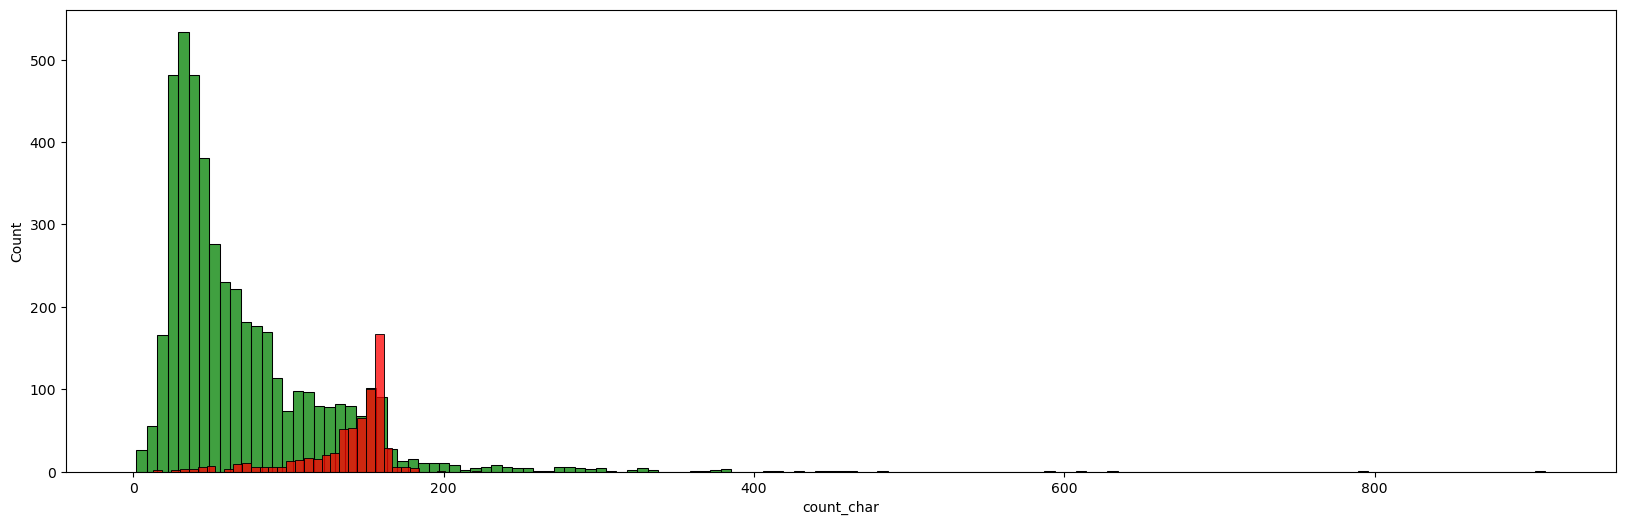

In [44]:
#graphical representation
plt.figure(figsize = (20,6))
sns.histplot(df[df['Target']== 0]['count_char'], color = 'green')
sns.histplot(df[df['Target']== 1]['count_char'], color = 'red')

<Axes: xlabel='count_word', ylabel='Count'>

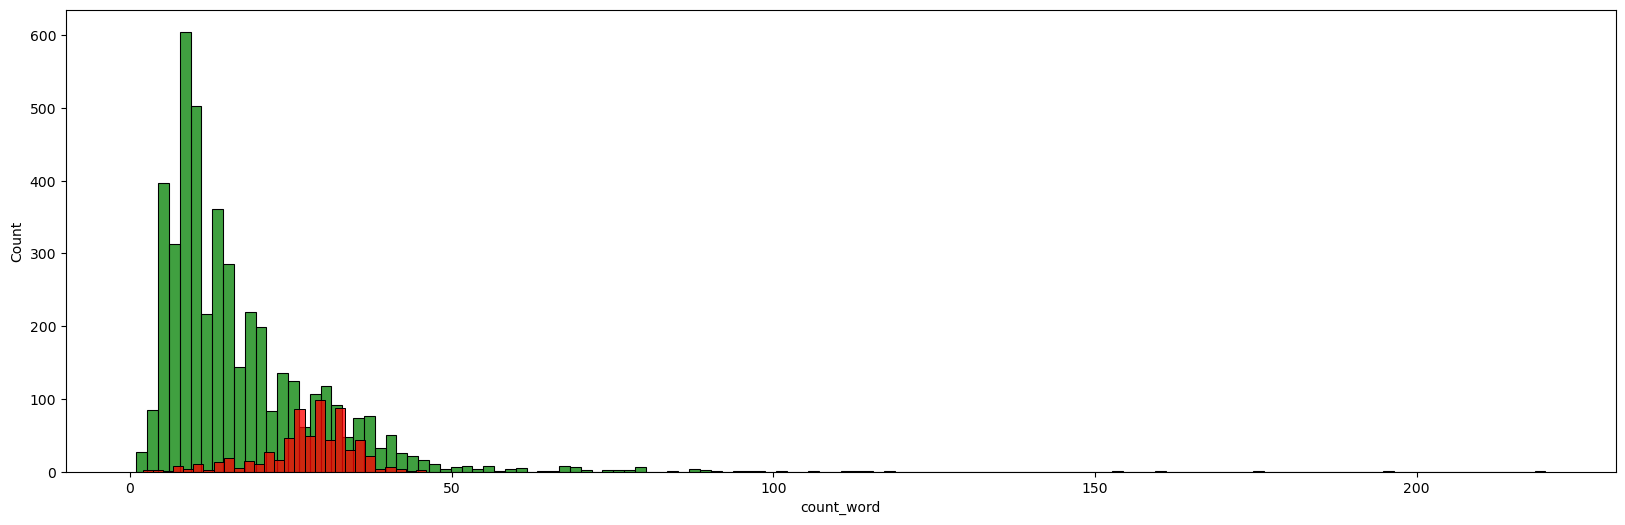

In [45]:
plt.figure(figsize = (20,6))
sns.histplot(df[df['Target']== 0]['count_word'], color = 'green')
sns.histplot(df[df['Target']== 1]['count_word'], color = 'red')

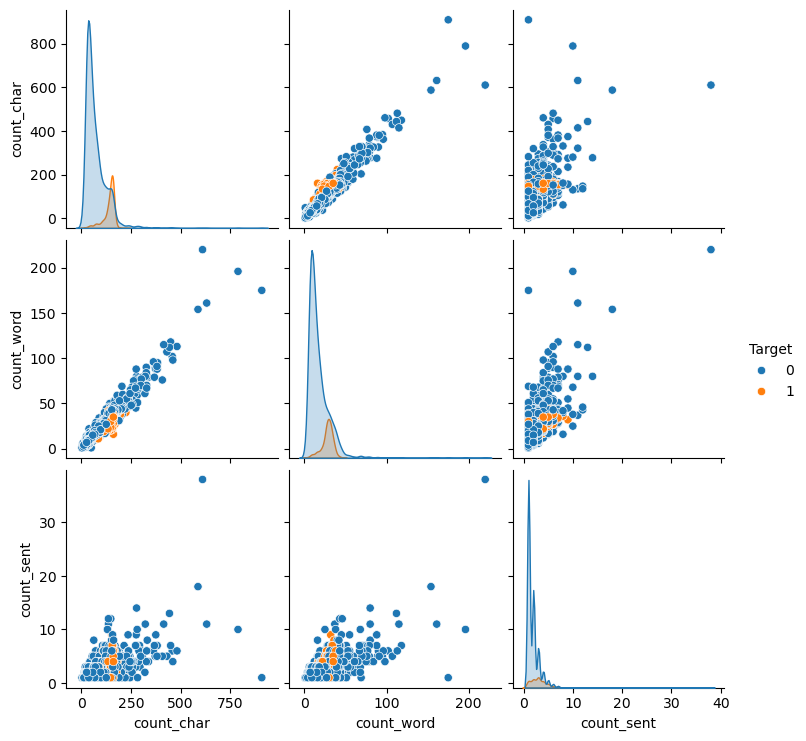

In [46]:
sns.pairplot(df, hue = 'Target')

In [47]:
df[['Target','count_char','count_word','count_sent']].corr()

,Target,count_char,count_word,count_sent
Target,1.000000,0.384717,0.262912,0.263939
count_char,0.384717,1.000000,0.965760,0.624139
count_word,0.262912,0.965760,1.000000,0.679971
count_sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

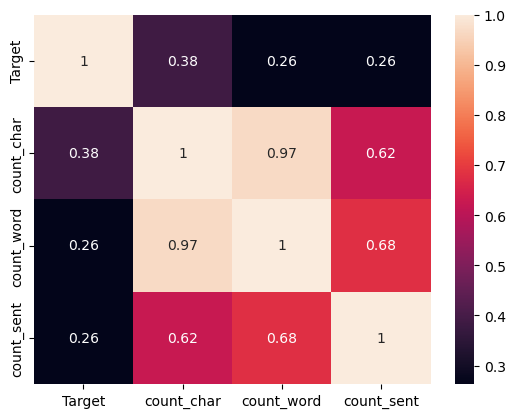

In [48]:
sns.heatmap(df[['Target','count_char','count_word','count_sent']].corr(), annot = True)

# 3. Text/Data Preprocessing

In [49]:
#lower case
#tokenization
#removing special character
#removing stop words and punctuatuions
#stemming

In [50]:
#stop words
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [54]:
def transfrom_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    x = []
    for i in text:
        if i.isalnum():
            x.append(i)

    text = x[:]
    x.clear()
    for i in text:
        if i not in string.punctuation and i not in stopwords.words('english'):
            x.append(i)


    text = x[:]
    x.clear()
    for i in text:
        x.append(ps.stem(i))
    return " ".join(x)

In [55]:
transfrom_text('do you like me and my friends dancing')

'like friend danc'

In [56]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [61]:
df['transform_message'] = df['Message'].apply(transfrom_text)

In [62]:
df.head()

,Target,Message,count_char,count_word,count_sent,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
wc = WordCloud(width = 800, height = 500, min_font_size = 10, background_color = 'white')

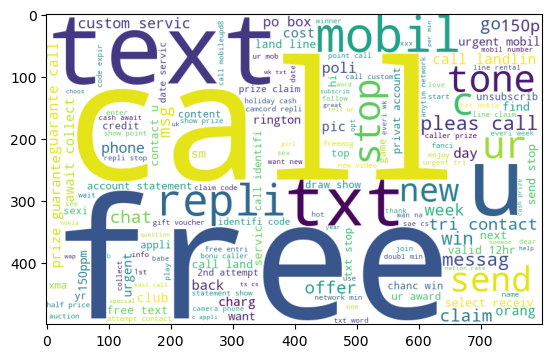

In [64]:
spam_wc = wc.generate(df[df['Target']==1]['transform_message'].str.cat(sep = " "))
plt.imshow(spam_wc)

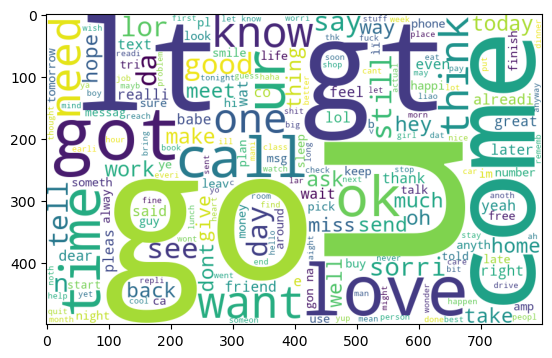

In [65]:
ham_wc = wc.generate(df[df['Target']==0]['transform_message'].str.cat(sep = " "))
plt.imshow(ham_wc)

In [66]:
spam = []
for msg in df[df['Target'] == 1]['transform_message'].tolist():
    for words in msg.split():
        spam.append(words)


In [67]:
len(spam)

9939

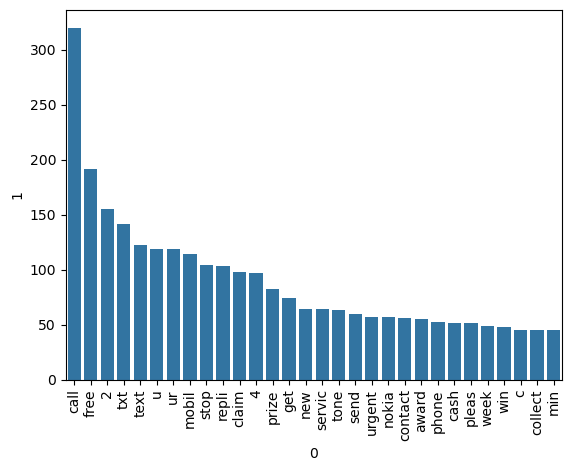

In [68]:
from collections import Counter
sns.barplot(
    x = pd.DataFrame(Counter(spam).most_common(30))[0], 
    y = pd.DataFrame(Counter(spam).most_common(30))[1]
)
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building (Navie Bayes Classifier)

In [69]:
#while doing classfication data must be in numerical form
#so vectorizing our data

In [70]:
df.head()

,Target,Message,count_char,count_word,count_sent,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [71]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()  #not satisfied with countvectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [72]:
x = tfidf.fit_transform(df['transform_message']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
x.shape

(5169, 3000)

In [74]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [79]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [80]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

#as we are working with spam classifier so percision is what matters most
# so we will choose multinomial nave bayes


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [81]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [82]:
# checking more ML algos

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [84]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [85]:
clf = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [86]:
clfs = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [87]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    #precision = precision_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    return accuracy,precision



In [90]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.975373100059696)

In [92]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Logistic Regression
Accuracy -  0.9564796905222437
Precision -  0.9667451506782998
For  Naive Bayes
Accuracy -  0.9709864603481625
Precision -  0.9838012958963283
For  Support Vector Machine
Accuracy -  0.9729206963249516
Precision -  0.9770976353928299
For  Decision Tree
Accuracy -  0.9410058027079303
Precision -  0.8798877896269648
For  Random Forest
Accuracy -  0.9758220502901354
Precision -  0.9789120972327079


In [93]:
import pandas as pd


In [94]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [95]:
performance_df

,Algorithm,Accuracy,Precision
1,Naive Bayes,0.970986,0.983801
4,Random Forest,0.975822,0.978912
2,Support Vector Machine,0.972921,0.977098
0,Logistic Regression,0.956480,0.966745
3,Decision Tree,0.941006,0.879888


In [96]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [97]:
performance_df1

,Algorithm,variable,value
0,Naive Bayes,Accuracy,0.970986
1,Random Forest,Accuracy,0.975822
2,Support Vector Machine,Accuracy,0.972921
3,Logistic Regression,Accuracy,0.956480
4,Decision Tree,Accuracy,0.941006
5,Naive Bayes,Precision,0.983801
6,Random Forest,Precision,0.978912
7,Support Vector Machine,Precision,0.977098
8,Logistic Regression,Precision,0.966745
9,Decision Tree,Precision,0.879888


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

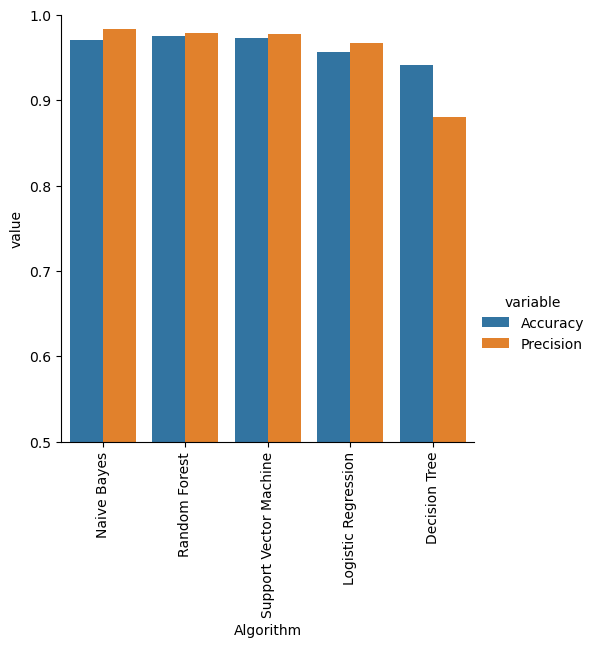

In [99]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [100]:
# could use more ml algos but at the end most suited one is NB algo

In [101]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [102]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [104]:
import pickle

with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
    
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
